<a href="https://colab.research.google.com/github/AlanGranea/Challenge-Telecom-X-Parte-2/blob/main/Challenge_Telecom_X_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Extracción del Archivo Tratado***

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('/content/df.csv')

In [3]:
datos['género'] = datos['género'].map({'Masculino': 0, 'Femenino': 1})

In [4]:
datos = datos.rename(columns={'cuidadano_mayor': 'ciudadano_mayor'})

In [5]:
datos

,id_cliente,churn,género,ciudadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,multiples_lineas_telefonicas,servicio_internet,...,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales,cargos_totales,cuentas_diarias,cantidad_servicios
0,0002-ORFBO,0,1,0,1,1,9,1,No,DSL,...,Yes,Yes,No,Un año,1,Cheque por correo,65.60,593.30,2.155059,5
1,0003-MKNFE,0,0,0,0,0,9,1,Yes,DSL,...,No,No,Yes,Mes a mes,0,Cheque por correo,59.90,542.40,1.967806,4
2,0004-TLHLJ,1,0,0,0,0,4,1,No,Fibra óptica,...,No,No,No,Mes a mes,1,Cheque electrónico,73.90,280.85,2.427727,3
3,0011-IGKFF,1,0,1,1,0,13,1,No,Fibra óptica,...,No,Yes,Yes,Mes a mes,1,Cheque electrónico,98.00,1237.85,3.219448,6
4,0013-EXCHZ,1,1,1,1,0,3,1,No,Fibra óptica,...,Yes,Yes,No,Mes a mes,1,Cheque por correo,83.90,267.40,2.756242,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,0,1,0,0,0,13,1,No,DSL,...,Yes,No,No,Un año,0,Cheque por correo,55.15,742.90,1.811761,4
7252,9992-RRAMN,1,0,0,1,0,22,1,Yes,Fibra óptica,...,No,No,Yes,Mes a mes,1,Cheque electrónico,85.10,1873.70,2.795664,4
7253,9992-UJOEL,0,0,0,0,0,2,1,No,DSL,...,No,No,No,Mes a mes,1,Cheque por correo,50.30,92.75,1.652431,3
7254,9993-LHIEB,0,0,0,1,1,67,1,No,DSL,...,Yes,No,Yes,Dos años,0,Cheque por correo,67.85,4627.65,2.228975,6


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_cliente                    7256 non-null   object 
 1   churn                         7256 non-null   int64  
 2   género                        7256 non-null   int64  
 3   ciudadano_mayor               7256 non-null   int64  
 4   pareja                        7256 non-null   int64  
 5   dependientes                  7256 non-null   int64  
 6   meses_de_contrato             7256 non-null   int64  
 7   servicio_telefonico           7256 non-null   int64  
 8   multiples_lineas_telefonicas  7256 non-null   object 
 9   servicio_internet             7256 non-null   object 
 10  seguridad_online              7256 non-null   object 
 11  respaldo_online               7256 non-null   object 
 12  proteccion_del_dispositivo    7256 non-null   object 
 13  sop

In [7]:
datos.isnull().sum()

,0
id_cliente,0
churn,0
género,0
ciudadano_mayor,0
pareja,0
dependientes,0
meses_de_contrato,0
servicio_telefonico,0
multiples_lineas_telefonicas,0
servicio_internet,0


# ***Eliminación de Columnas Irrelevantes***

In [8]:
print(datos.nunique().sort_values())

churn                              2
género                             2
ciudadano_mayor                    2
pareja                             2
servicio_telefonico                2
dependientes                       2
factura_en_linea                   2
servicio_internet                  3
proteccion_del_dispositivo         3
soporte_tecnico                    3
seguridad_online                   3
respaldo_online                    3
servicio_tv                        3
servicio_de_peliculas              3
tipo_de_contrato                   3
multiples_lineas_telefonicas       3
forma_de_pago                      4
cantidad_servicios                 9
meses_de_contrato                 72
cargos_mensuales                1584
cuentas_diarias                 1584
cargos_totales                  6530
id_cliente                      7256
dtype: int64


In [9]:
columnas_unicas = [col for col in datos.columns if datos[col].nunique() == 1]
print(f'Las columnas con valores únicos son: {columnas_unicas}')

Las columnas con valores únicos son: []


In [10]:
correlacion = datos.select_dtypes(include=['float64', 'int64']).corr().abs()
correlacion

,churn,género,ciudadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,factura_en_linea,cargos_mensuales,cargos_totales,cuentas_diarias,cantidad_servicios
churn,1.000000,0.005066,0.144205,0.138289,0.152112,0.336071,0.008584,0.184176,0.179774,0.190198,0.179774,0.022013
género,0.005066,1.000000,0.004239,0.004593,0.011884,0.005936,0.006065,0.011417,0.013126,0.000488,0.013126,0.015292
ciudadano_mayor,0.144205,0.004239,1.000000,0.023439,0.212338,0.017333,0.009885,0.157470,0.220098,0.103499,0.220098,0.119076
pareja,0.138289,0.004593,0.023439,1.000000,0.448500,0.379684,0.019496,0.010303,0.098064,0.316918,0.098064,0.194140
dependientes,0.152112,0.011884,0.212338,0.448500,1.000000,0.163444,0.003212,0.110541,0.114345,0.063960,0.114345,0.006290
meses_de_contrato,0.336071,0.005936,0.017333,0.379684,0.163444,1.000000,0.009661,0.006662,0.246981,0.825118,0.246981,0.474168
servicio_telefonico,0.008584,0.006065,0.009885,0.019496,0.003212,0.009661,1.000000,0.013804,0.247323,0.113791,0.247323,0.082308
factura_en_linea,0.184176,0.011417,0.157470,0.010303,0.110541,0.006662,0.013804,1.000000,0.353503,0.159303,0.353503,0.241991
cargos_mensuales,0.179774,0.013126,0.220098,0.098064,0.114345,0.246981,0.247323,0.353503,1.000000,0.652109,1.000000,0.851845
cargos_totales,0.190198,0.000488,0.103499,0.316918,0.063960,0.825118,0.113791,0.159303,0.652109,1.000000,0.652109,0.778440


In [ ]:
# Dado que cuentas_diarias y cargos_mensuales tienen la misma correlatividad, conviene eliminar cuentas_diarias.
# Otras columnas que se eliminarán serán id_cliente porque tiene identificadores únicos y cantidad_servicios por su alta correlación en columnas irrelevantes para relacionarlas con churn.
# También, otras columnas que se eliminará por su baja correlacion con churn y el resto de columnas serán servicio_telefonico y género.
# Si bien cargos_totales puede ser útil con churn, su multicolinealidad del 0.82 con meses_de_contrato la hace una columna inviable para el modelo.

In [11]:
df_reducido = datos.drop(columns = ['id_cliente', 'cuentas_diarias', 'cantidad_servicios', 'servicio_telefonico', 'cargos_totales', 'género'])
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   churn                         7256 non-null   int64  
 1   ciudadano_mayor               7256 non-null   int64  
 2   pareja                        7256 non-null   int64  
 3   dependientes                  7256 non-null   int64  
 4   meses_de_contrato             7256 non-null   int64  
 5   multiples_lineas_telefonicas  7256 non-null   object 
 6   servicio_internet             7256 non-null   object 
 7   seguridad_online              7256 non-null   object 
 8   respaldo_online               7256 non-null   object 
 9   proteccion_del_dispositivo    7256 non-null   object 
 10  soporte_tecnico               7256 non-null   object 
 11  servicio_tv                   7256 non-null   object 
 12  servicio_de_peliculas         7256 non-null   object 
 13  tip

# ***Verificación de la Proporción de Cancelación (Churn)***

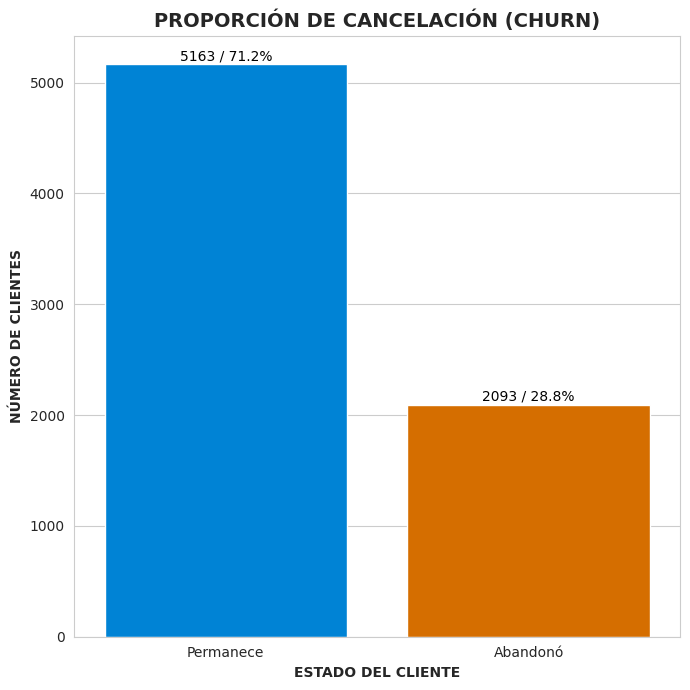

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

valores = df_reducido['churn'].value_counts()
porcentajes = df_reducido['churn'].value_counts(normalize=True) * 100

df_aux = df_reducido['churn'].map({0: 'Permanece', 1: 'Abandonó'}).to_frame(name='Estado')
sns.set_style("whitegrid")
plt.figure(figsize=(7, 7))
colores = ['#0083d5', '#d56e00']

ax = sns.countplot(x='Estado', data=df_aux, color=None)
for patch, color in zip(ax.patches, colores):
    patch.set_facecolor(color)

plt.title('PROPORCIÓN DE CANCELACIÓN (CHURN)', fontsize=14, fontweight='bold', loc='center')
plt.xlabel('ESTADO DEL CLIENTE', fontsize=10, fontweight='bold')
plt.ylabel('NÚMERO DE CLIENTES', fontsize=10, fontweight='bold')

for p in ax.patches:
    cantidad = int(p.get_height())
    porcentaje = cantidad / len(df_reducido['churn']) * 100
    ax.annotate(f'{cantidad} / {porcentaje:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black',
                xytext=(0, 1), textcoords='offset points')

plt.tight_layout()
plt.show()

# ***Análisis de Correlación... otra vez...***

In [13]:
df_corr = df_reducido.select_dtypes(include=['float64', 'int64']).corr().abs()

In [14]:
import plotly.express as px

fig = px.imshow(
    df_corr,
    text_auto=".2f",
    color_continuous_scale="viridis",
    aspect="auto",
    title="MATRIZ DE CORRELACIÓN"
)
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40))
fig.show()

In [ ]:
# Al analizar la primera columna de la matriz, se puede identificar claramente los factores más influyentes.
# El predictor principal es meses_de_contrato con una correlación del 0.34. La interpretación es que a mayor antigüedad, menor es la probabilidad de cancelar.
# Después hay predictores secundarios cuyo impacto es moderado. Por ejemplo: cargos_mensuales y factura_en_linea (ambas con 0.18) mantienen un peso considerable.
# Ambos intuyen que los clientes con cargos más altos o con factura online tienen una leve tendencia mayor a cancelar.
# El grupo de variables demográficas ahora tiene más protagonismo (dependientes con 0.15, pareja con 0.14 y ciudadano_mayor con 0.14), aunque su impacto individual es débil.
# En conjunto le dan al modelo un perfil claro del cliente. Por ejemplo: Ser un ciudadano mayor, tener pareja o dependientes tiene una influencia positiva muy leve en la probabilidad de abandono.

# Otras conclusiones a sacar son que la correlación más fuerte en toda la matriz es entre pareja y dependientes con 0.45, por lo que quienen tengan pareja son más propensos a tener dependientes.
# Otra correlación moderada es entre pareja y meses_de_contrato con 0.38, esto sugiere que los clientes con pareja tienden a tener contratos de mayor duración.
# Y por último, la correlación entre factura_en_linea y cargos_mensuales es moderada con 0.35, eso indica que los clientes con cargos mensuales más altos son más propensos a usar la facturación en línea.

# ***Análisis Dirigido***

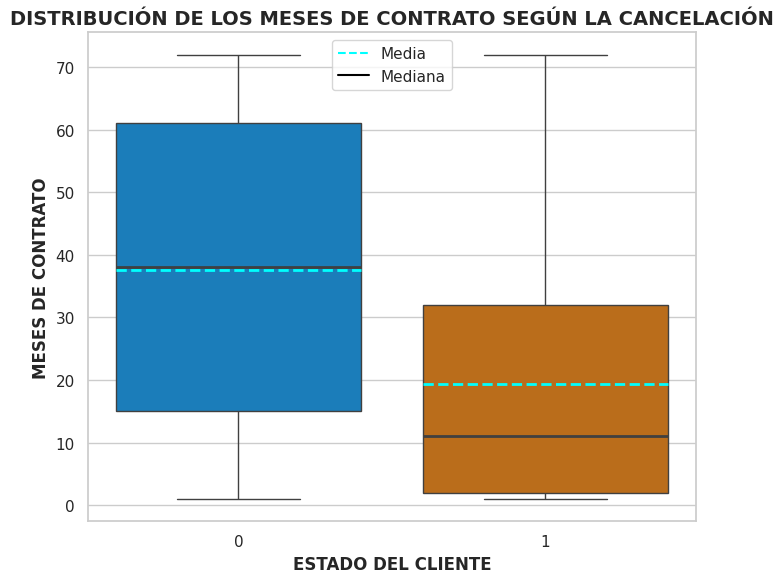

In [15]:
from matplotlib.lines import Line2D

sns.set(style="whitegrid")
plt.figure(figsize=(7, 6))

ax = sns.boxplot(
    data=df_reducido,
    x='churn',
    y='meses_de_contrato',
    hue='churn',
    palette={0: '#0083d5', 1: '#d56e00'},
    legend=False,
    medianprops={'linewidth': 2}
)

for i, (name, group) in enumerate(df_reducido.groupby('churn')):
    ax.hlines(
        y=group['meses_de_contrato'].mean(),
        xmin=i - 0.4,
        xmax=i + 0.4,
        color='cyan',
        linestyle='--',
        linewidth = 2
    )

plt.title("DISTRIBUCIÓN DE LOS MESES DE CONTRATO SEGÚN LA CANCELACIÓN", fontsize=14, fontweight='bold', loc = 'center')
plt.xlabel("ESTADO DEL CLIENTE", fontsize=12, fontweight='bold')
plt.ylabel("MESES DE CONTRATO", fontsize=12, fontweight='bold')

legend_elements = [
    Line2D([0], [0], color='cyan', linestyle='--', label='Media'),
    Line2D([0], [0], color='black', label='Mediana')
]

ax.legend(handles=legend_elements, loc='upper center')
plt.tight_layout()
plt.show()

In [ ]:
# En el grupo 0 la mediana es ligeramente más alta que la media (aunque ambas tienen casi el mismo valor, aproximadamente 38 meses).
# Hay una amplia dispersión en el rango de los meses (De 1 a más de 70), lo que indica una clientela con permanencias muy diversas.
# La mayoría de los clientes que no cancelaron han permanecido mucho más tiempo con la empresa.
# Mientras tanto, en el grupo 1, la mediana está entre 10 y 12 meses y la media está entre 19 y 20 meses, por lo que es más alta que la mediana.
# Los clientes que cancelan tienden a tener menos meses de contrato.

# Esto esto indica una relación entre las variables: Cuanto más meses de contrato, menor es la probabilidad de cancelación, por lo que la retención de largo plazo disminuye la tasa de churn.

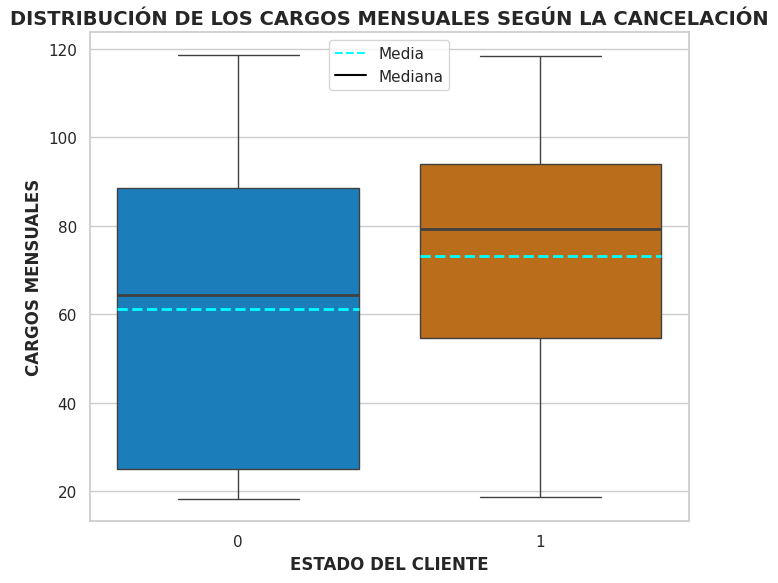

In [16]:
from matplotlib.lines import Line2D

sns.set(style="whitegrid")
plt.figure(figsize=(7, 6))

ax = sns.boxplot(
    data=df_reducido,
    x='churn',
    y='cargos_mensuales',
    hue='churn',
    palette={0: '#0083d5', 1: '#d56e00'},
    legend=False,
    medianprops={'linewidth': 2}
)

for i, (name, group) in enumerate(df_reducido.groupby('churn')):
    ax.hlines(
        y=group['cargos_mensuales'].mean(),
        xmin=i - 0.4,
        xmax=i + 0.4,
        color='cyan',
        linestyle='--',
        linewidth = 2
    )

plt.title("DISTRIBUCIÓN DE LOS CARGOS MENSUALES SEGÚN LA CANCELACIÓN", fontsize=14, fontweight='bold', loc = 'center')
plt.xlabel("ESTADO DEL CLIENTE", fontsize=12, fontweight='bold')
plt.ylabel("CARGOS MENSUALES", fontsize=12, fontweight='bold')

legend_elements = [
    Line2D([0], [0], color='cyan', linestyle='--', label='Media'),
    Line2D([0], [0], color='black', label='Mediana')
]

ax.legend(handles=legend_elements, loc='upper center')
plt.tight_layout()
plt.show()

In [ ]:
# En este grupo 0 la mediana de cargos mensuales es cercana a 65 al igual que la media, solo que esta es mínimamente menor a la mediana (aproximadamente 62).
# Existe una distribución amplia pero es relativamente más baja en valores.
# En cambio, en el grupo 1 la mediana ronda casi los 80 (es mayor que el grupo que no canceló) y la media ronda si los 75, siendo más alto que el grupo 0.
# Esto demuestra que muchos clientes que cancelan tienen cargos mensuales más altos.

# En este boxplot existe una relación inversa entre las variables: Los clientes con cargos más altos tienden a cancelar más.
# Esto podría deberse a una percepción de alto costo o baja percepción de valor por el precio pagado.

# ***Separación de Datos***

In [17]:
df_reducido.columns

Index(['churn', 'ciudadano_mayor', 'pareja', 'dependientes',
       'meses_de_contrato', 'multiples_lineas_telefonicas',
       'servicio_internet', 'seguridad_online', 'respaldo_online',
       'proteccion_del_dispositivo', 'soporte_tecnico', 'servicio_tv',
       'servicio_de_peliculas', 'tipo_de_contrato', 'factura_en_linea',
       'forma_de_pago', 'cargos_mensuales'],
      dtype='object')

In [18]:
df_reducido

,churn,ciudadano_mayor,pareja,dependientes,meses_de_contrato,multiples_lineas_telefonicas,servicio_internet,seguridad_online,respaldo_online,proteccion_del_dispositivo,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales
0,0,0,1,1,9,No,DSL,No,Yes,No,Yes,Yes,No,Un año,1,Cheque por correo,65.60
1,0,0,0,0,9,Yes,DSL,No,No,No,No,No,Yes,Mes a mes,0,Cheque por correo,59.90
2,1,0,0,0,4,No,Fibra óptica,No,No,Yes,No,No,No,Mes a mes,1,Cheque electrónico,73.90
3,1,1,1,0,13,No,Fibra óptica,No,Yes,Yes,No,Yes,Yes,Mes a mes,1,Cheque electrónico,98.00
4,1,1,1,0,3,No,Fibra óptica,No,No,No,Yes,Yes,No,Mes a mes,1,Cheque por correo,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0,0,0,0,13,No,DSL,Yes,No,No,Yes,No,No,Un año,0,Cheque por correo,55.15
7252,1,0,1,0,22,Yes,Fibra óptica,No,No,No,No,No,Yes,Mes a mes,1,Cheque electrónico,85.10
7253,0,0,0,0,2,No,DSL,No,Yes,No,No,No,No,Mes a mes,1,Cheque por correo,50.30
7254,0,0,1,1,67,No,DSL,Yes,No,Yes,Yes,No,Yes,Dos años,0,Cheque por correo,67.85


In [19]:
X = df_reducido.drop('churn', axis = 1)
y = df_reducido['churn']

In [20]:
X

,ciudadano_mayor,pareja,dependientes,meses_de_contrato,multiples_lineas_telefonicas,servicio_internet,seguridad_online,respaldo_online,proteccion_del_dispositivo,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales
0,0,1,1,9,No,DSL,No,Yes,No,Yes,Yes,No,Un año,1,Cheque por correo,65.60
1,0,0,0,9,Yes,DSL,No,No,No,No,No,Yes,Mes a mes,0,Cheque por correo,59.90
2,0,0,0,4,No,Fibra óptica,No,No,Yes,No,No,No,Mes a mes,1,Cheque electrónico,73.90
3,1,1,0,13,No,Fibra óptica,No,Yes,Yes,No,Yes,Yes,Mes a mes,1,Cheque electrónico,98.00
4,1,1,0,3,No,Fibra óptica,No,No,No,Yes,Yes,No,Mes a mes,1,Cheque por correo,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0,0,0,13,No,DSL,Yes,No,No,Yes,No,No,Un año,0,Cheque por correo,55.15
7252,0,1,0,22,Yes,Fibra óptica,No,No,No,No,No,Yes,Mes a mes,1,Cheque electrónico,85.10
7253,0,0,0,2,No,DSL,No,Yes,No,No,No,No,Mes a mes,1,Cheque por correo,50.30
7254,0,1,1,67,No,DSL,Yes,No,Yes,Yes,No,Yes,Dos años,0,Cheque por correo,67.85


In [21]:
y

,churn
0,0
1,0
2,1
3,1
4,1
...,...
7251,0
7252,1
7253,0
7254,0


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [23]:
columnas_categoricas = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
columnas_numericas = ['meses_de_contrato', 'cargos_mensuales']

# ***Encoding***

In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [25]:
one_hot = make_column_transformer((OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), columnas_categoricas), (StandardScaler(), columnas_numericas), remainder='passthrough', sparse_threshold=0)

In [26]:
X_train_encoded = one_hot.fit_transform(X_train)
X_test_encoded = one_hot.transform(X_test)

In [27]:
one_hot.get_feature_names_out()

array(['onehotencoder__multiples_lineas_telefonicas_No phone service',
       'onehotencoder__multiples_lineas_telefonicas_Yes',
       'onehotencoder__servicio_internet_Fibra óptica',
       'onehotencoder__servicio_internet_No',
       'onehotencoder__seguridad_online_No internet service',
       'onehotencoder__seguridad_online_Yes',
       'onehotencoder__respaldo_online_No internet service',
       'onehotencoder__respaldo_online_Yes',
       'onehotencoder__proteccion_del_dispositivo_No internet service',
       'onehotencoder__proteccion_del_dispositivo_Yes',
       'onehotencoder__soporte_tecnico_No internet service',
       'onehotencoder__soporte_tecnico_Yes',
       'onehotencoder__servicio_tv_No internet service',
       'onehotencoder__servicio_tv_Yes',
       'onehotencoder__servicio_de_peliculas_No internet service',
       'onehotencoder__servicio_de_peliculas_Yes',
       'onehotencoder__tipo_de_contrato_Mes a mes',
       'onehotencoder__tipo_de_contrato_Un año',
    

In [28]:
X_train_df = pd.DataFrame(X_train_encoded, columns = one_hot.get_feature_names_out())
X_train_df

,onehotencoder__multiples_lineas_telefonicas_No phone service,onehotencoder__multiples_lineas_telefonicas_Yes,onehotencoder__servicio_internet_Fibra óptica,onehotencoder__servicio_internet_No,onehotencoder__seguridad_online_No internet service,onehotencoder__seguridad_online_Yes,onehotencoder__respaldo_online_No internet service,onehotencoder__respaldo_online_Yes,onehotencoder__proteccion_del_dispositivo_No internet service,onehotencoder__proteccion_del_dispositivo_Yes,...,onehotencoder__tipo_de_contrato_Un año,onehotencoder__forma_de_pago_Cheque por correo,onehotencoder__forma_de_pago_Tarjeta de crédito,onehotencoder__forma_de_pago_Transferencia bancaria,standardscaler__meses_de_contrato,standardscaler__cargos_mensuales,remainder__ciudadano_mayor,remainder__pareja,remainder__dependientes,remainder__factura_en_linea
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.603771,0.641127,1.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.563162,0.945206,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.603771,-0.518691,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.238863,0.290523,0.0,1.0,1.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.832773,0.297170,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1.279472,0.197472,0.0,0.0,0.0,0.0
5800,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.198254,0.484934,1.0,0.0,0.0,1.0
5801,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-1.035818,1.182819,0.0,0.0,0.0,1.0
5802,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.603771,-1.309627,1.0,0.0,0.0,0.0


In [29]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5804 entries, 0 to 5803
Data columns (total 27 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   onehotencoder__multiples_lineas_telefonicas_No phone service   5804 non-null   float64
 1   onehotencoder__multiples_lineas_telefonicas_Yes                5804 non-null   float64
 2   onehotencoder__servicio_internet_Fibra óptica                  5804 non-null   float64
 3   onehotencoder__servicio_internet_No                            5804 non-null   float64
 4   onehotencoder__seguridad_online_No internet service            5804 non-null   float64
 5   onehotencoder__seguridad_online_Yes                            5804 non-null   float64
 6   onehotencoder__respaldo_online_No internet service             5804 non-null   float64
 7   onehotencoder__respaldo_online_Yes                          

In [30]:
X_test_df = pd.DataFrame(X_test_encoded, columns=one_hot.get_feature_names_out())
X_test_df

,onehotencoder__multiples_lineas_telefonicas_No phone service,onehotencoder__multiples_lineas_telefonicas_Yes,onehotencoder__servicio_internet_Fibra óptica,onehotencoder__servicio_internet_No,onehotencoder__seguridad_online_No internet service,onehotencoder__seguridad_online_Yes,onehotencoder__respaldo_online_No internet service,onehotencoder__respaldo_online_Yes,onehotencoder__proteccion_del_dispositivo_No internet service,onehotencoder__proteccion_del_dispositivo_Yes,...,onehotencoder__tipo_de_contrato_Un año,onehotencoder__forma_de_pago_Cheque por correo,onehotencoder__forma_de_pago_Tarjeta de crédito,onehotencoder__forma_de_pago_Transferencia bancaria,standardscaler__meses_de_contrato,standardscaler__cargos_mensuales,remainder__ciudadano_mayor,remainder__pareja,remainder__dependientes,remainder__factura_en_linea
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.994635,1.011671,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.197680,-1.474128,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.263672,-0.563555,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.913417,-1.499052,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1.279472,-0.669899,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.319508,1.274208,1.0,1.0,0.0,1.0
1448,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,-0.589118,-1.334551,0.0,1.0,1.0,1.0
1449,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,-0.995209,-1.500714,0.0,1.0,1.0,0.0
1450,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,-0.101810,-1.495729,0.0,1.0,0.0,0.0


In [31]:
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 27 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   onehotencoder__multiples_lineas_telefonicas_No phone service   1452 non-null   float64
 1   onehotencoder__multiples_lineas_telefonicas_Yes                1452 non-null   float64
 2   onehotencoder__servicio_internet_Fibra óptica                  1452 non-null   float64
 3   onehotencoder__servicio_internet_No                            1452 non-null   float64
 4   onehotencoder__seguridad_online_No internet service            1452 non-null   float64
 5   onehotencoder__seguridad_online_Yes                            1452 non-null   float64
 6   onehotencoder__respaldo_online_No internet service             1452 non-null   float64
 7   onehotencoder__respaldo_online_Yes                          

# ***Balanceo de Clases***

In [32]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_df, y_train)

print("Distribución original:", Counter(y))
print("Distribución con el entrenamiento:", Counter(y_train))
print("Distribución con el entrenamiento balanceado:", Counter(y_train_bal))

Distribución original: Counter({0: 5163, 1: 2093})
Distribución con el entrenamiento: Counter({0: 4130, 1: 1674})
Distribución con el entrenamiento balanceado: Counter({0: 4130, 1: 4130})


# ***Normalización o Estandarización***

In [ ]:
# En esta etapa, no hace falta normalizar o estandarizar los datos antes del entrenamiento de modelos ya que si bien hay algunos que lo necesitan.
# La realidad es que ya se aplicó la estandarización automáticamente a las variables numéricas mediante StandardScaler dentro del make_column_transformer.
# Eso si, las variables binarias ('ciudadano_mayor', 'pareja', 'dependientes' y 'factura_en_linea') no se estandarizaron debido a que su escala no afecta a los algoritmos

# ***Creación de Modelos***

In [33]:
from sklearn.linear_model import LogisticRegression

modelo_rl = LogisticRegression(max_iter=1000, random_state=42)

modelo_rl.fit(X_train_bal, y_train_bal)

LogisticRegression(max_iter=1000, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

modelo_rf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)